In [13]:
import os
import locale
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Set environment variables for UTF-8 encoding
os.environ["PYTHONIOENCODING"] = "utf-8"
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

# Load and clean dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'
df = pd.read_csv(url, encoding='utf-8')
df['Text'] = df['Text'].apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8'))

In [14]:
# Define features and labels
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Re-encode text data to ensure UTF-8 compatibility
x_train = x_train.apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8'))
x_test = x_test.apply(lambda x: x.encode('utf-8', errors='ignore').decode('utf-8'))

# Define vectorizers
vectorizers = {
    "CountVectorizer": CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20),
    "TfidfVectorizer": TfidfVectorizer(min_df=20, norm='l2', smooth_idf=True, use_idf=True, stop_words='english'),
    "HashingVectorizer": HashingVectorizer(n_features=200, alternate_sign=False)
}

# Define models and parameter grids
models = {
    "LogisticRegression": (LogisticRegression(max_iter=1000, random_state=0), {'C': [0.001, 0.01, 0.1, 1, 10]}),
    "KNN": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    "RandomForest": (RandomForestClassifier(random_state=0), {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}),
    "XGBoost": (XGBClassifier(), {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200], 'max_depth': [3, 4]}),
    "SVM": (SVC(probability=True, random_state=0), {'kernel': ['linear', 'rbf'], 'C': [0.1, 1]}),
    "NaiveBayes": (BernoulliNB(), {'alpha': [0.1, 0.5, 1.0]})
}


Vectorizer: CountVectorizer

Evaluating LogisticRegression with CountVectorizer
Best Parameters for LogisticRegression: {'C': 10}
Accuracy of LogisticRegression with CountVectorizer: 0.9479


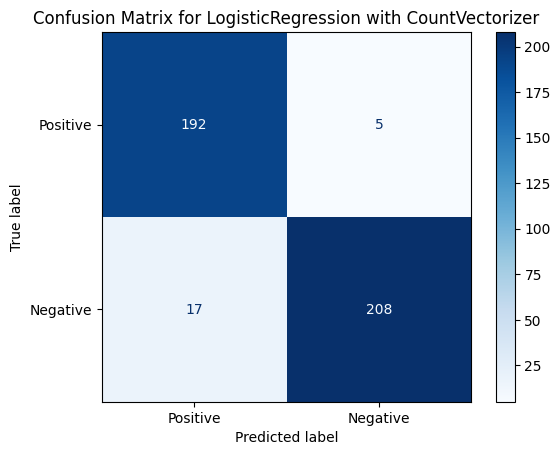

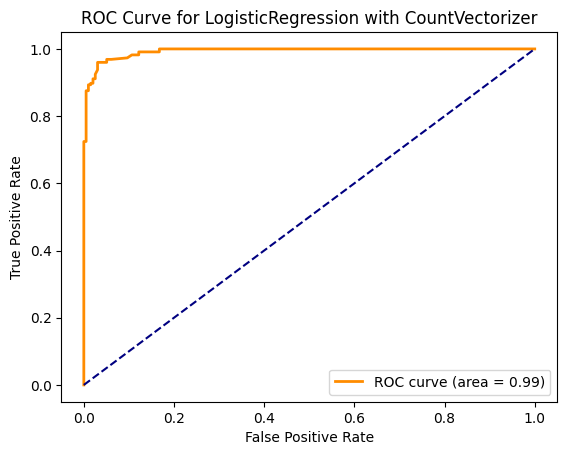


Evaluating KNN with CountVectorizer
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of KNN with CountVectorizer: 0.9502


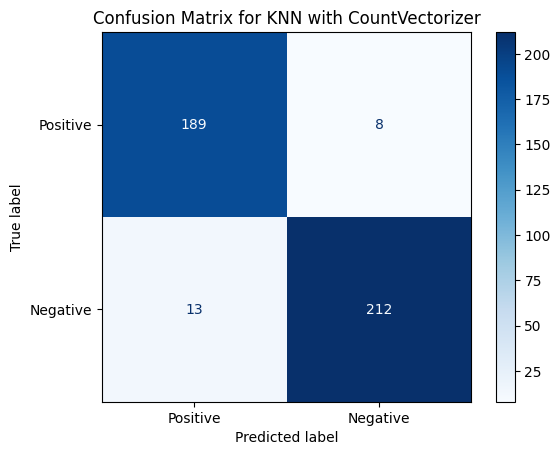

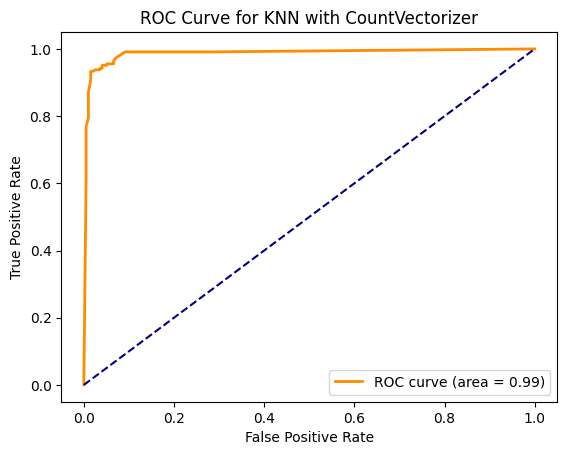


Evaluating RandomForest with CountVectorizer
Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of RandomForest with CountVectorizer: 0.9550


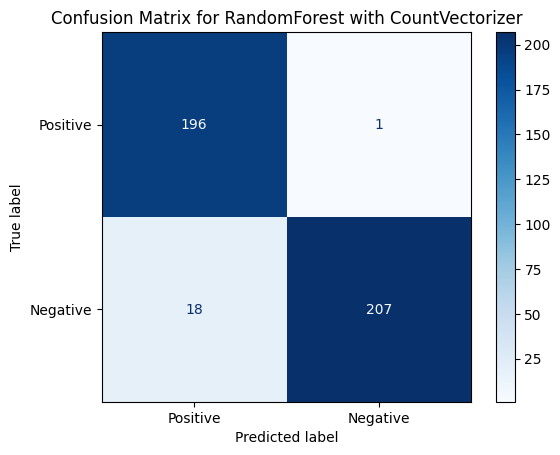

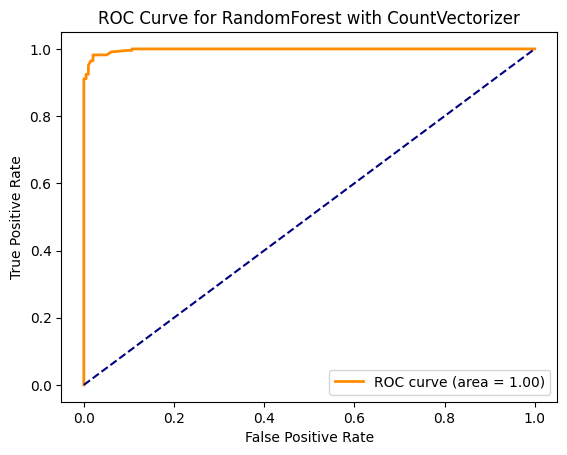


Evaluating XGBoost with CountVectorizer
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Accuracy of XGBoost with CountVectorizer: 0.9550


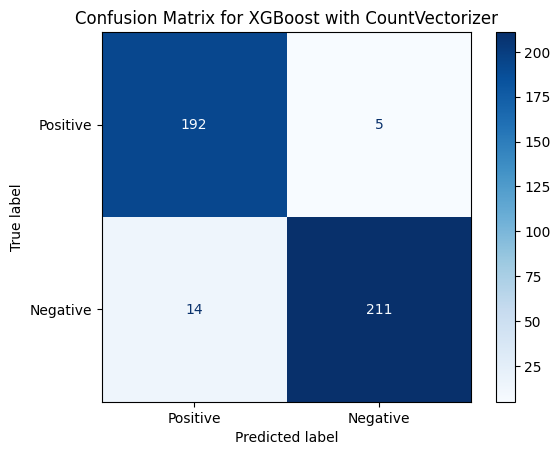

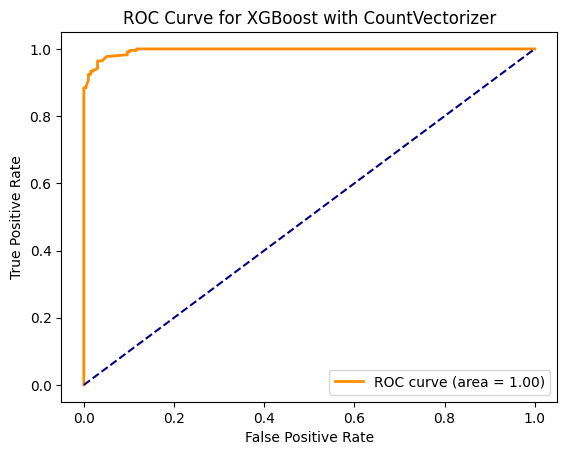


Evaluating SVM with CountVectorizer
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy of SVM with CountVectorizer: 0.9597


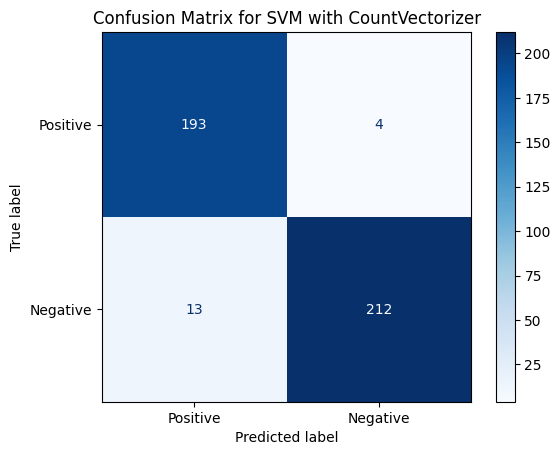

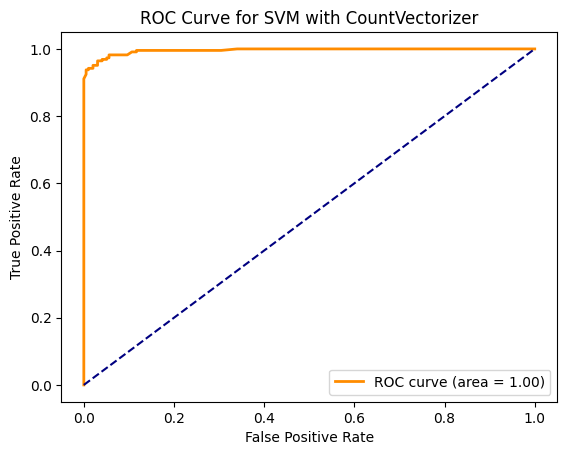


Evaluating NaiveBayes with CountVectorizer
Best Parameters for NaiveBayes: {'alpha': 0.5}
Accuracy of NaiveBayes with CountVectorizer: 0.9502


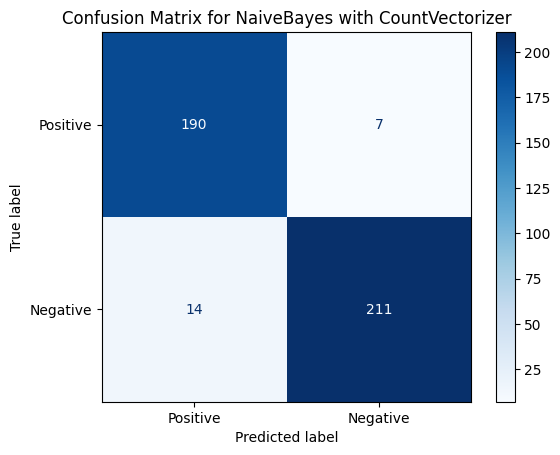

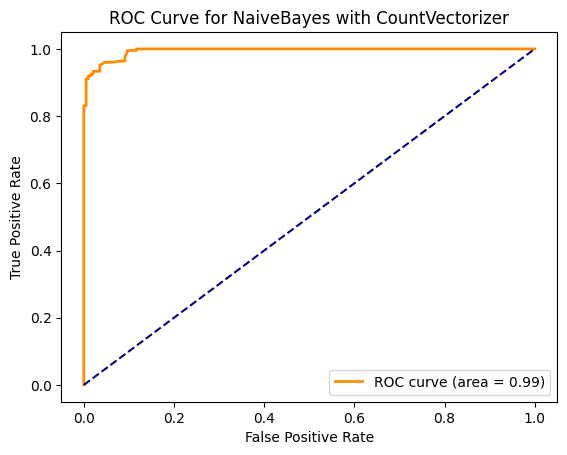


Vectorizer: TfidfVectorizer

Evaluating LogisticRegression with TfidfVectorizer
Best Parameters for LogisticRegression: {'C': 1}
Accuracy of LogisticRegression with TfidfVectorizer: 0.9621


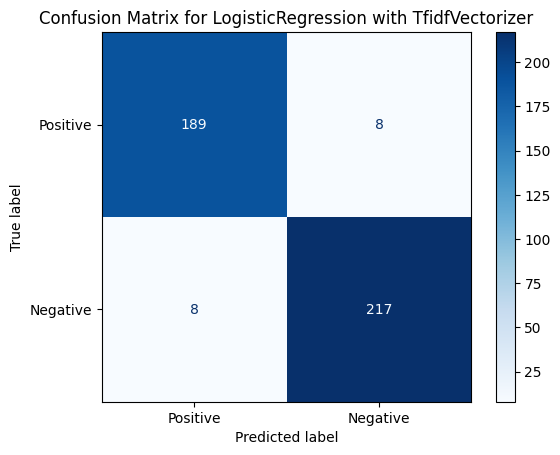

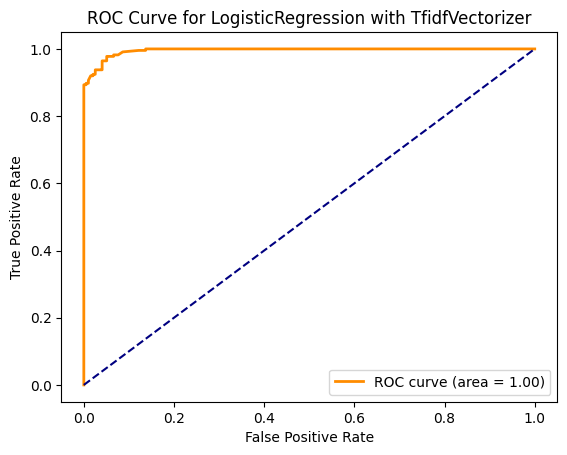


Evaluating KNN with TfidfVectorizer
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of KNN with TfidfVectorizer: 0.9076


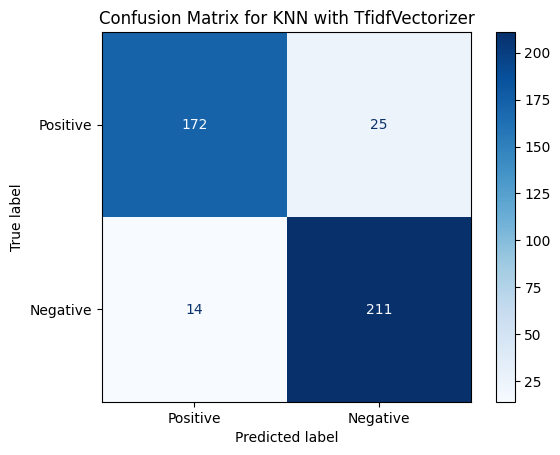

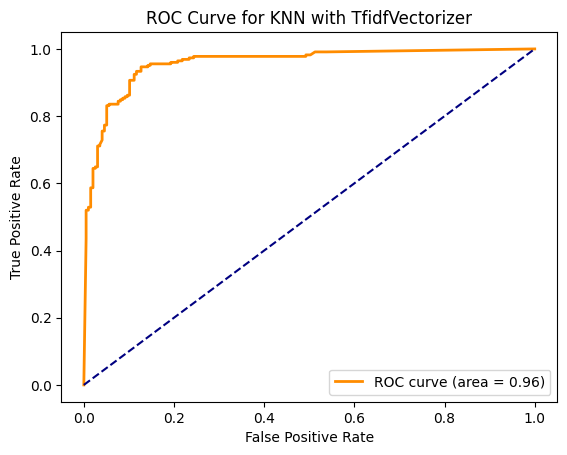


Evaluating RandomForest with TfidfVectorizer
Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of RandomForest with TfidfVectorizer: 0.9621


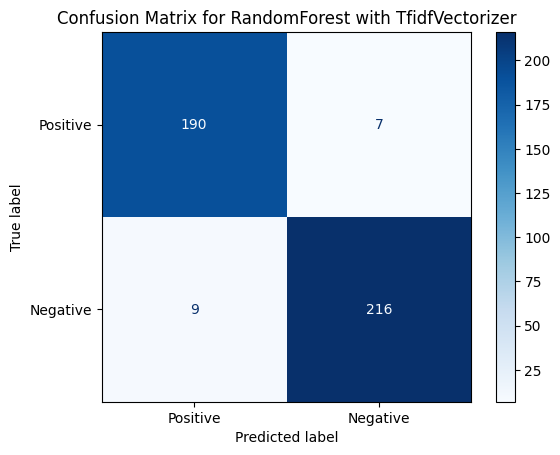

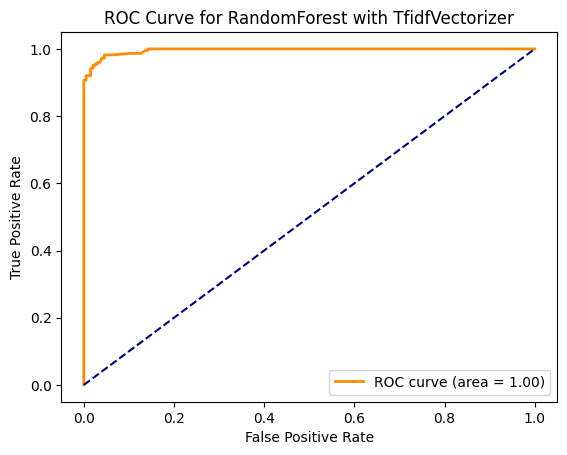


Evaluating XGBoost with TfidfVectorizer
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Accuracy of XGBoost with TfidfVectorizer: 0.9716


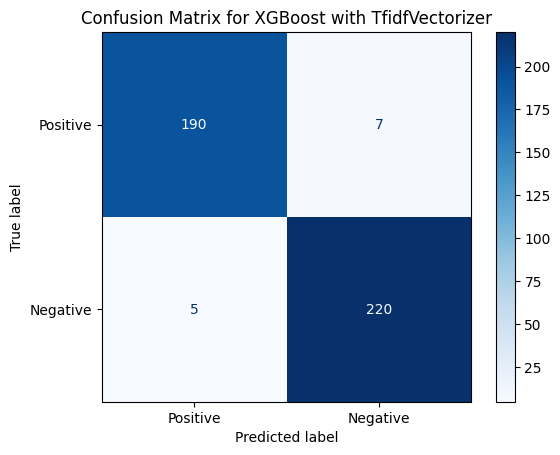

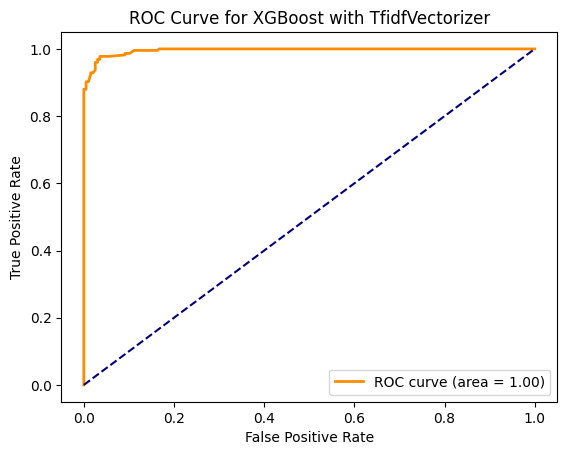


Evaluating SVM with TfidfVectorizer
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy of SVM with TfidfVectorizer: 0.9621


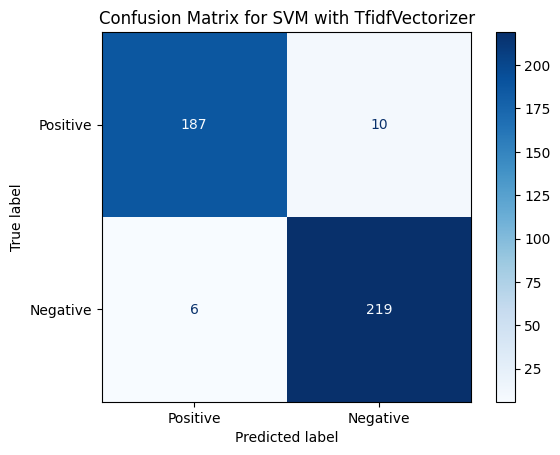

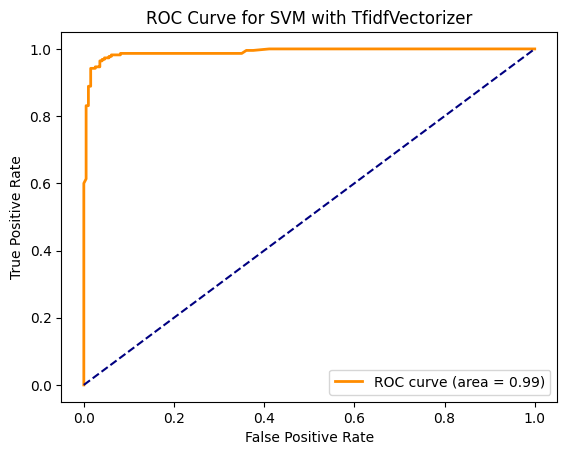


Evaluating NaiveBayes with TfidfVectorizer
Best Parameters for NaiveBayes: {'alpha': 1.0}
Accuracy of NaiveBayes with TfidfVectorizer: 0.9526


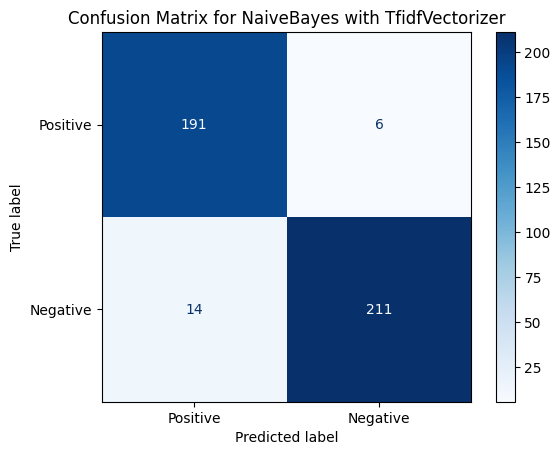

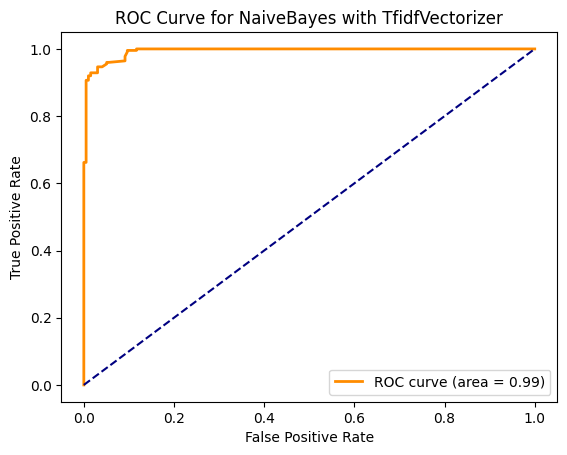


Vectorizer: HashingVectorizer

Evaluating LogisticRegression with HashingVectorizer
Best Parameters for LogisticRegression: {'C': 10}
Accuracy of LogisticRegression with HashingVectorizer: 0.9621


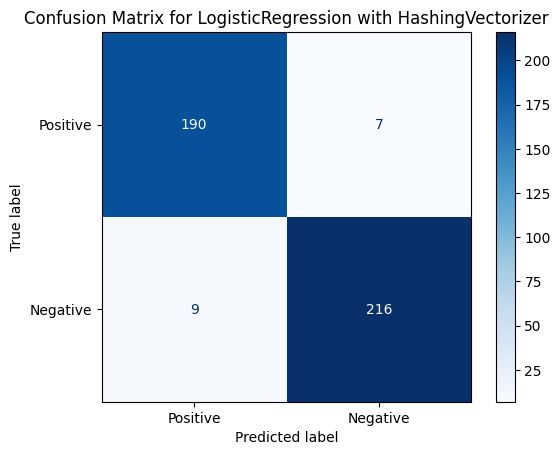

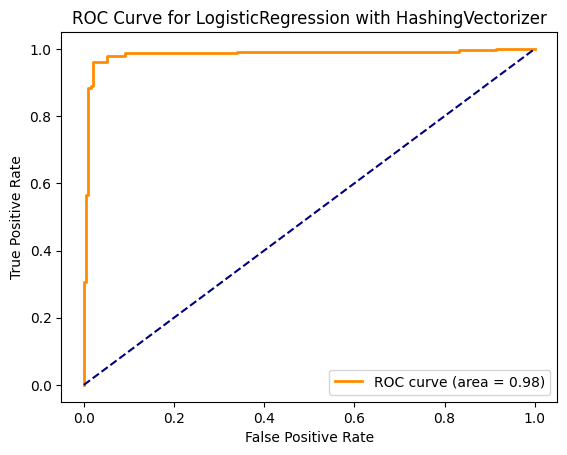


Evaluating KNN with HashingVectorizer
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Accuracy of KNN with HashingVectorizer: 0.9313


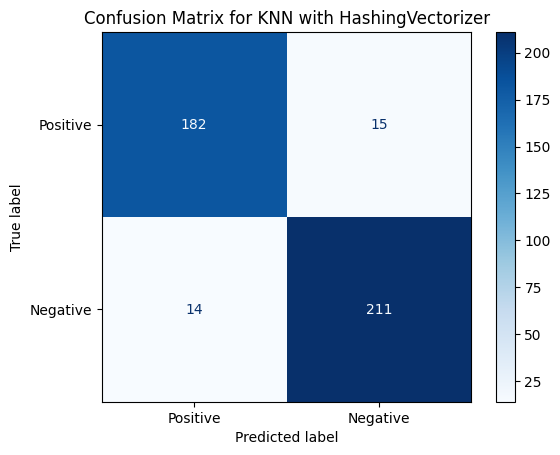

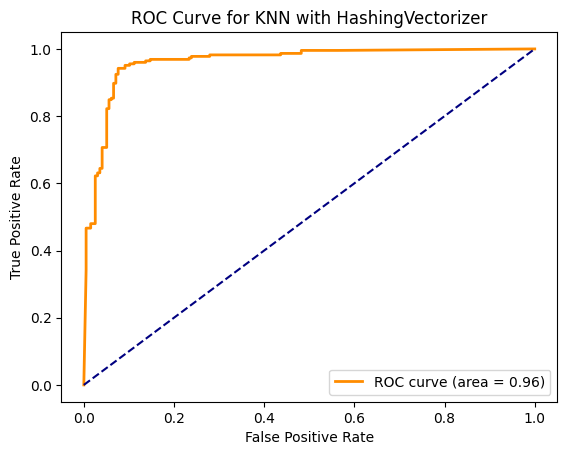


Evaluating RandomForest with HashingVectorizer
Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of RandomForest with HashingVectorizer: 0.9716


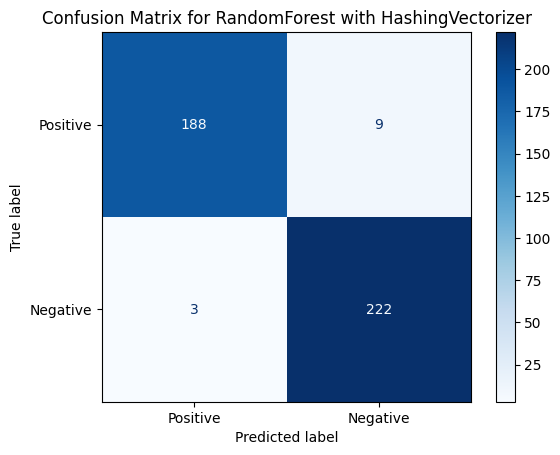

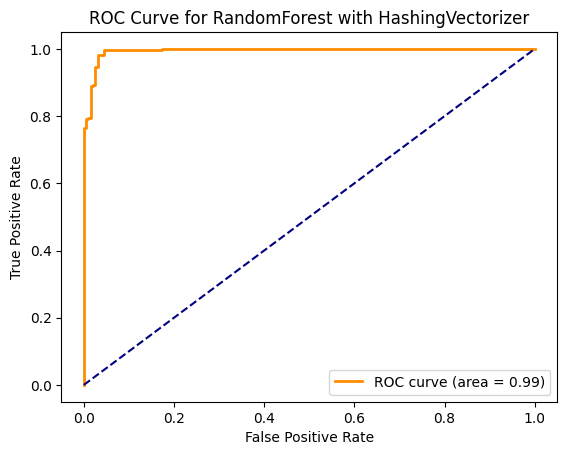


Evaluating XGBoost with HashingVectorizer
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy of XGBoost with HashingVectorizer: 0.9716


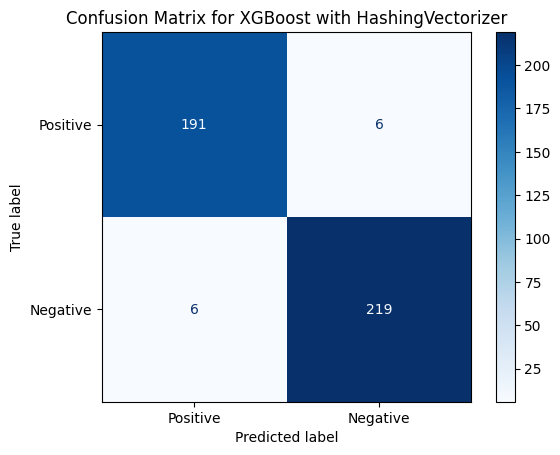

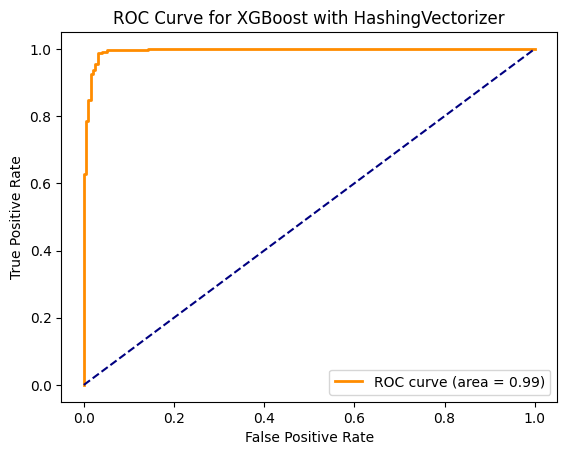


Evaluating SVM with HashingVectorizer
Best Parameters for SVM: {'C': 1, 'kernel': 'rbf'}
Accuracy of SVM with HashingVectorizer: 0.9739


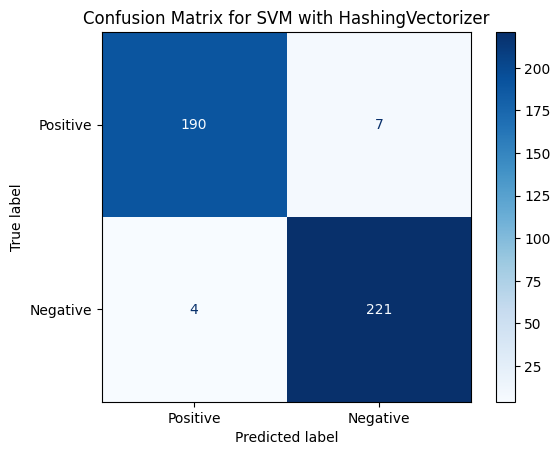

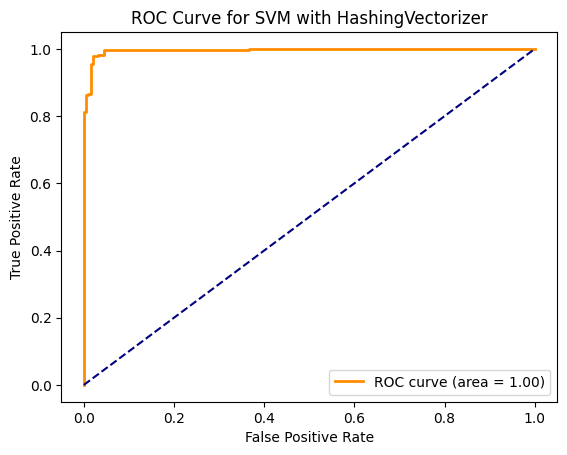


Evaluating NaiveBayes with HashingVectorizer
Best Parameters for NaiveBayes: {'alpha': 0.5}
Accuracy of NaiveBayes with HashingVectorizer: 0.9147


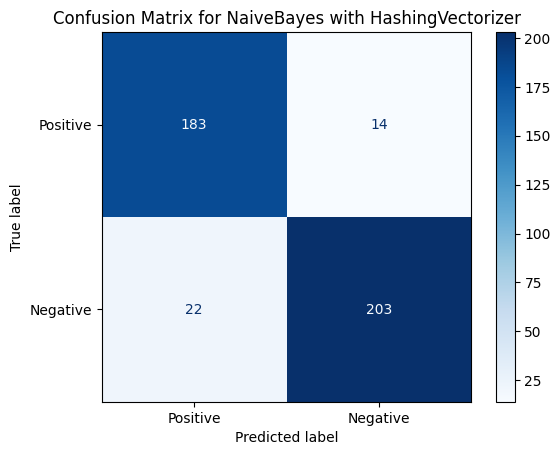

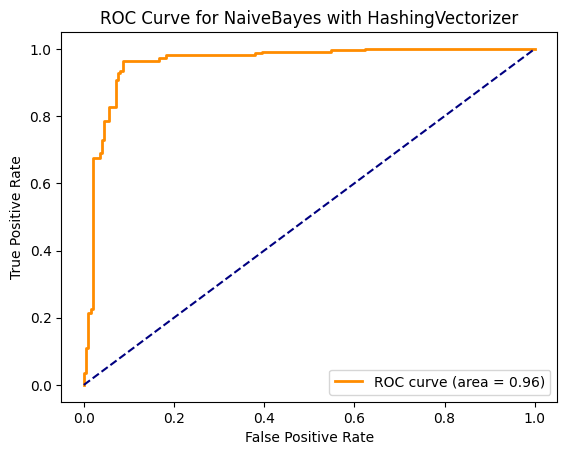

In [15]:
# Iterate over vectorizers and models
for vec_name, vectorizer in vectorizers.items():
    print(f"\nVectorizer: {vec_name}")
    
    # Vectorize the training and test data
    x_train_vec = vectorizer.fit_transform(x_train)
    x_test_vec = vectorizer.transform(x_test)
    
    for model_name, (model, param_grid) in models.items():
        print(f"\nEvaluating {model_name} with {vec_name}")
        
        # Perform grid search with sequential backend
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=1)
        
        try:
            grid_search.fit(x_train_vec, y_train)
        except UnicodeEncodeError as e:
            print(f"Encoding error encountered with model {model_name} and vectorizer {vec_name}: {e}")
            continue  # Skip this combination if there's an encoding issue

        # Retrieve best model and evaluate on test data
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(x_test_vec)
        
        # Print accuracy and best parameters
        print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of {model_name} with {vec_name}: {accuracy:.4f}")
        
        # Display the confusion matrix
        ConfusionMatrixDisplay.from_estimator(best_model, x_test_vec, y_test, display_labels=['Positive', 'Negative'], cmap='Blues')
        plt.title(f'Confusion Matrix for {model_name} with {vec_name}')
        plt.show()
        
        # Calculate and plot ROC curve and AUC score if model supports probability estimates
        if hasattr(best_model, "predict_proba") or hasattr(best_model, "decision_function"):
            if hasattr(best_model, "predict_proba"):
                y_scores = best_model.predict_proba(x_test_vec)[:, 1]
            else:
                y_scores = best_model.decision_function(x_test_vec)
            
            fpr, tpr, _ = roc_curve(y_test, y_scores)
            auc = roc_auc_score(y_test, y_scores)
            
            plt.figure()
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve for {model_name} with {vec_name}')
            plt.legend(loc="lower right")
            plt.show()